In [1]:
import numpy as np
import matplotlib.pyplot as plt 

# Linear Regression

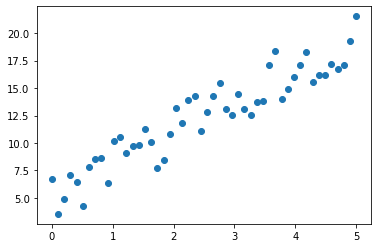

In [2]:
# Creating data
x = np.linspace(0,5,50)
y = 3*x + 5 + 5*(np.random.random(x.shape) - 0.5)
plt.scatter(x,y)

In [3]:
A = np.array([
    [x.dot(x), np.sum(x)],
    [np.sum(x), len(x)]
])
b = np.array([
    x.dot(y),
    np.sum(y)
])

In [4]:
coefs = np.linalg.inv(A).dot(b)
print("coefficients: ",coefs)

coefficients:  [2.63167198 5.77933562]


In [5]:
# Linear Regression higher dimension
x = 5*np.random.random((20,2))
y = 4*x[:,0] + 5*x[:,1] + 10 + 3*(np.random.random(len(x)) - 0.5)

In [6]:
class LinearRegression:
#     def __init__(self):
        
    def fit(self,x,y):
        N,dim = x.shape
        x_tmp = np.ones((N,dim+1))
        x_tmp[:,:-1] = x # adding one more cols of ones for the independent coeff.
        A = np.zeros((dim+1,dim+1))
        b = np.zeros((dim+1))
        for i in range(dim + 1):
            for j in range(i,dim + 1):
                A[i][j] = x_tmp[:,i].dot(x_tmp[:,j])
                A[j][i] = A[i][j]
            b[i] = x_tmp[:,i].dot(y)
        Ainv = np.linalg.inv(A)
        coeffs = Ainv.dot(b)
        self.coeffs = coeffs
    
    def predict(self,x):
        return x.dot(self.coeffs[:-1]) + self.coeffs[-1]

In [7]:
model = LinearRegression()
model.fit(x,y)
print(model.coeffs)

[ 3.9388527   5.01827613 10.16628479]


In [8]:
print(y)
print(model.predict(x))

[21.48714165 41.25464496 38.14428949 25.75053624 46.35028398 17.84588915
 33.61224787 42.5340202  19.28553682 30.195484   47.82857347 41.71274127
 28.1729597  43.53681355 31.58229705 41.01625534 22.22420494 46.94821723
 46.835628   50.03900781]
[21.41906483 41.9427496  38.12161318 25.7792401  47.10599509 17.36280365
 32.89904467 41.27877127 19.69543784 29.19449674 47.14387458 41.35729714
 27.81097256 43.42503523 32.98096675 40.47744988 23.77709721 45.69697129
 47.77279711 51.11509402]


# PCA: Principal Component Analysis

In [10]:
class PCA:
    def __init__(self,n_components):
        self.n_components = n_components
    def fit(self,x):
        N, dim = x.shape
        mean = np.sum(x,axis=0) / N
        d = (x - mean).reshape((N,dim,1))
        dT = d.transpose((0,2,1))
        sigma = np.sum(np.matmul(d,dT),axis=0) / N
        eigval, eigvec = np.linalg.eig(sigma)
        self.eigval = eigval
        self.eigvec = eigvec
        idxs = np.argsort(eigval)[:-self.n_components-1:-1]
        self.basis = eigvec[:,idxs]
    def predict(self,x):
        return x.dot(self.basis)

In [11]:
pca = PCA(2)

In [12]:
v1 = np.random.random((1,3))
v2 = np.random.random((1,3))
u = 10*np.random.random((20,1))
v = 10*np.random.random((20,1))
noise = np.random.random((20,3)) - 0.5
noise[:,:-1] = 0
x = u.dot(v1) + v.dot(v2) + 2*noise

In [13]:
pca.fit(x)

In [14]:
e1 = pca.eigval
e2 = pca.eigvec

In [16]:
print(e1,"\n",e2)
print(pca.basis)

[1.86371735e+01 7.88644218e-03 5.33211164e-01] 
 [[ 0.19564008  0.97960883  0.04573296]
 [ 0.74038826 -0.11696283 -0.66192516]
 [ 0.64307867 -0.16335924  0.74817349]]
[[ 0.19564008  0.04573296]
 [ 0.74038826 -0.66192516]
 [ 0.64307867  0.74817349]]


In [17]:
norm2 = np.cross(e2[:,0],e2[:,2])
norm2 = norm2 / np.sqrt(norm2.dot(norm2))
print(norm2)

[ 0.97960883 -0.11696283 -0.16335924]


In [18]:
norm1 = np.cross(v1.reshape(3),v2.reshape(3))
norm1 = norm1 / np.sqrt(norm1.dot(norm1))
print(norm1)

[-0.9704042   0.07126701  0.23073081]


# kNN (k Nearest Neighbours)